###### 지능정보시스템 기말고사 대체 과제
* 인생영화 (컨택트) 리뷰 데이터 가져오기
* 위드 클라우드 그리기, 분류기 학습시키기

# 201600282 엄기산

## 데이터 크롤링 수행

In [16]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

import time


movie_reviews = []
movie_scores = []

for i in range(1,450):
    url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=136869&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=" + str(i)
    html = urlopen(url)
    
    soup = BeautifulSoup(html.read(), "html.parser")
    
    time.sleep(1)
    
    review_text = []
    points_text = []
    
    scores = soup.find_all('div',{'class' : "star_score"})
    for data in scores:
        sc = data.find('em')
        points_text.append(float(sc.text))
    

    delidx = []
    for j in range(10):
        re = soup.find('span',{'id' :"_filtered_ment_" + str(j)})
        if re:
            review_text.append(re.get_text().strip())

    
    movie_reviews += review_text
    movie_scores += points_text


## 크롤링 결과 frame 저장

In [20]:
import pandas as pd

frame = pd.DataFrame({'score': movie_scores, 'review': movie_reviews})
frame

,score,review
0,10.0,"이 내러티브에 대하여 고작 반전, 서스펜스, 스릴러 타령이나 하시는 평론가 분들께선..."
1,8.0,"""전쟁을 하면 그 누구도 승자가 없다. 미망인만 생길 뿐"" -샹 장군 아내의 유언-"
2,10.0,문과판 인터스텔라 라는 말이 이해가 된다
3,10.0,당신은 이미 끝을 알면서 무엇을 시작하겠다고 마음 먹을 수 있습니까?
4,10.0,이 영화가 어렵지만 반드시 봐야하는 이유는 진짜 ‘지금까지 본 적 없는 SF’이기 때문
...,...,...
4480,9.0,영화는 재밌는데 영화중간에 봉지과자좀 쳐 뜯어먹지마라 그리고 핸드폰 전화가 왔음 진...
4481,10.0,이건 영화관 가서 봐라.
4482,10.0,외계인과의 소통 지금 누구하고 다르게 그만큼 소통이 중요하죠
4483,10.0,최고의 SF 영화 이건 다시 한 번 극장각임


## 긍정 및 부정 각각 비슷한 비율의 갯수로 문장 가져오기위한 갯수 파악

In [21]:
frame[frame['score']>8].count

<bound method DataFrame.count of       score                                             review
0      10.0  이 내러티브에 대하여 고작 반전, 서스펜스, 스릴러 타령이나 하시는 평론가 분들께선...
2      10.0                             문과판 인터스텔라 라는 말이 이해가 된다
3      10.0             당신은 이미 끝을 알면서 무엇을 시작하겠다고 마음 먹을 수 있습니까?
4      10.0   이 영화가 어렵지만 반드시 봐야하는 이유는 진짜 ‘지금까지 본 적 없는 SF’이기 때문
5      10.0  외계와의 첫 접촉에 대한 영화는 많았지만 쌩 호들갑 떨지않고 이렇게 담담하고 이지적...
...     ...                                                ...
4480    9.0  영화는 재밌는데 영화중간에 봉지과자좀 쳐 뜯어먹지마라 그리고 핸드폰 전화가 왔음 진...
4481   10.0                                      이건 영화관 가서 봐라.
4482   10.0                  외계인과의 소통 지금 누구하고 다르게 그만큼 소통이 중요하죠
4483   10.0                           최고의 SF 영화 이건 다시 한 번 극장각임
4484   10.0                                   한나는 거꾸로해도 한나 ...

[3221 rows x 2 columns]>

In [137]:
frame[frame['score']<5].count

<bound method DataFrame.count of       score                                             review
135     1.0                           Arrival은 한국어로 [컨택트]라고 읽음
159     1.0  인문학적 영화라고 하는데 말하고자 하는 시간에 대한 이야기와 외계인이라는 소재가 그...
201     1.0                                      중국자본 들어갔음?잣같네
226     1.0                                 졸면서 봤다.. 실화냐이거 ㅋㅋㅋ
228     1.0  주인공이 그런 인지능력을 갖게 된 경위는 다 떼어먹고, 결국 외계언어로 일방적 통보...
...     ...                                                ...
2703    4.0                                    처음부터 끝까지 컴컴한 화면
2862    3.0                                  외계인을 상상하기가 쉽지가 않네
4266    4.0  내가좋아하는 감독, 배우들, 음악도 나쁘지 않음. 그런데 뭔가 내 마음에 와닿지 않...
4268    4.0                                    그냥생각보다는 기대를좀했더니
4355    4.0                                      잘봤습니다   감사합니다

[280 rows x 2 columns]>

부정의 문장이 280개 이므로 긍정의 문장도 280개를 가져온다.

In [49]:
pos = pd.DataFrame({'score' : frame[frame['score']>8]['score'][:280],'review' : frame[frame['score']>8]['review'][:280]})

neg = pd.DataFrame({'score' : frame[frame['score']<5]['score'][:280],'review' : frame[frame['score']<5]['review'][:280]})

df = pd.concat([pos,neg])
df

,score,review
0,10.0,"이 내러티브에 대하여 고작 반전, 서스펜스, 스릴러 타령이나 하시는 평론가 분들께선..."
2,10.0,문과판 인터스텔라 라는 말이 이해가 된다
3,10.0,당신은 이미 끝을 알면서 무엇을 시작하겠다고 마음 먹을 수 있습니까?
4,10.0,이 영화가 어렵지만 반드시 봐야하는 이유는 진짜 ‘지금까지 본 적 없는 SF’이기 때문
5,10.0,외계와의 첫 접촉에 대한 영화는 많았지만 쌩 호들갑 떨지않고 이렇게 담담하고 이지적...
...,...,...
2703,4.0,처음부터 끝까지 컴컴한 화면
2862,3.0,외계인을 상상하기가 쉽지가 않네
4266,4.0,"내가좋아하는 감독, 배우들, 음악도 나쁘지 않음. 그런데 뭔가 내 마음에 와닿지 않..."
4268,4.0,그냥생각보다는 기대를좀했더니


# 1) 워드 클라우드 그리기

In [45]:
from konlpy.tag import Okt
okt = Okt()

In [46]:
ko_doc = '\n'.join(df['review'])
print(ko_doc[:1000])

이 내러티브에 대하여 고작 반전, 서스펜스, 스릴러 타령이나 하시는 평론가 분들께선 다함께 손 잡고 은퇴하시는 게 어떻습니까?
문과판 인터스텔라 라는 말이 이해가 된다
당신은 이미 끝을 알면서 무엇을 시작하겠다고 마음 먹을 수 있습니까?
이 영화가 어렵지만 반드시 봐야하는 이유는 진짜 ‘지금까지 본 적 없는 SF’이기 때문
외계와의 첫 접촉에 대한 영화는 많았지만 쌩 호들갑 떨지않고 이렇게 담담하고 이지적으로 접근한 영화는 없었던거 같다. 정말로 지구 밖 문명이 도착(arrival)한다면 우리 인류는 이렇게 할 수 있을까.
와 진짜 이런영화는 어쩌다 탄생하냐 ㅋㅋㅋ
간만에 지적인 sf영화가 나왔다.
외계인을 만나면 무엇이 재일 먼저 바뀔까? 기술? 과학? 언어? 이 영화는 더욱 근본적인걸 건들였다. 인간이 사유하는 방식이 바뀔 수 있다는걸
진짜 대박영화 그동안 봤던 SF물 영화가 아님 몰입력 역대급
영화를 보면서 내용에 대한 약간의 생각도 귀찮아하는 불친절한 영화를 싫어한다면 보지 말 것. 때리고 부수는 SF를 기대한다면 보지 말 것. 그럼에도 괜히 보고나서 평점 낮추지 말 것.
꼭 설명이 충분하지 않아도 관람자 입장에서 해석되는 끝없이 잔잔하게 치는 파도같은 영화.. 과연 한국에서 흥행할 수 있을지 의문이긴 하네요
음악이 정말 한몫하는군요 자동차 엔진도 녀석들 소리로 들리더만요 휴
왜 크리스토퍼 놀란 감독을 잇는 감독이라고 칭하는지 알겠음  영화 너무 좋음
언어학과 상상력을 이렇게 조합할 수 있구나 하는 걸 느끼고 돌아갑니다.
여운이 긴 영화입니다.원작도 읽어보고 싶어요!
드니 빌뇌브가 재능있는 감독임이 다시 한번 입증되었다. 더불어 10월에 개봉할 블레이드 러너 2049에 대한 기대감이 한층 높아졌다.
인문학적 상상력으로 잘 짜여진 운명과 패러독스
이게 왜 이해하기가 어렵징? 작중에서 친절하게 모든 설명을 해주는데....
에이미아담스의 연기력을 제대로 보여줌 인생영화가 아닐까
사람은 자신이 쓰는 언어에 따라 생각하게 된다.
영화가 끝나고 한참을 앉아있었다.

In [47]:
print(len(ko_doc))

31375


In [48]:
import time

start = time.time()
ko_doc_noun = okt.nouns(ko_doc)
print(time.time()-start)

9.818610191345215


In [50]:
from collections import Counter

count_noun = Counter(ko_doc_noun)

## 리뷰 데이터의 단어 별 빈도수 확인 후 의미 없는 단어 삭제

In [51]:
count_noun.most_common(20)

[('영화', 386),
 ('외계인', 69),
 ('생각', 57),
 ('이', 51),
 ('이해', 50),
 ('것', 50),
 ('내용', 46),
 ('정말', 44),
 ('진짜', 43),
 ('평점', 41),
 ('미래', 40),
 ('수', 38),
 ('그', 37),
 ('시간', 37),
 ('점', 36),
 ('왜', 32),
 ('사람', 32),
 ('언어', 31),
 ('감독', 31),
 ('말', 28)]

In [52]:
stopword_list = ['영화','것','이','수','그', '컨택트']

for word in count_noun:
    if len(word) == 1:
        stopword_list.append(word)
        
stopword_list[-5:]

['꾹', '값', '뼈', '책', '퉷']

In [53]:
# stopword 단어를 모두 pop()

for stopword in stopword_list:
    if stopword in count_noun:
        count_noun.pop(stopword)

In [54]:
import numpy as np
from PIL import Image

img_mask = np.array(Image.open('present.jpg'))

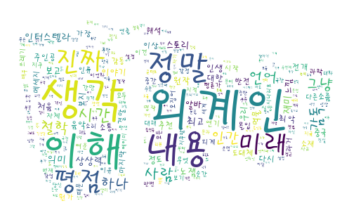

In [55]:
from wordcloud import WordCloud

# mac OS: '/Library/Fonts/NanumBarunGothic.ttf'
wc_noun = WordCloud(background_color='white', max_words=2000, 
                     font_path=r'C:\Windows\Fonts\HMFMPYUN.ttf', mask=img_mask)
wc_noun = wc_noun.generate_from_frequencies(count_noun)

import matplotlib.pyplot as plt
plt.imshow(wc_noun, interpolation="bilinear")
plt.axis("off")
plt.show()

# 2) 분류기 학습시키기

데이터 전처리

In [67]:
df_pos = pd.DataFrame({'score':'pos','review':pos['review']})
df_neg = pd.DataFrame({'score':'neg','review':neg['review']})

df_nltk = pd.concat([df_pos,df_neg])
df_nltk

,score,review
0,pos,"이 내러티브에 대하여 고작 반전, 서스펜스, 스릴러 타령이나 하시는 평론가 분들께선..."
2,pos,문과판 인터스텔라 라는 말이 이해가 된다
3,pos,당신은 이미 끝을 알면서 무엇을 시작하겠다고 마음 먹을 수 있습니까?
4,pos,이 영화가 어렵지만 반드시 봐야하는 이유는 진짜 ‘지금까지 본 적 없는 SF’이기 때문
5,pos,외계와의 첫 접촉에 대한 영화는 많았지만 쌩 호들갑 떨지않고 이렇게 담담하고 이지적...
...,...,...
2703,neg,처음부터 끝까지 컴컴한 화면
2862,neg,외계인을 상상하기가 쉽지가 않네
4266,neg,"내가좋아하는 감독, 배우들, 음악도 나쁘지 않음. 그런데 뭔가 내 마음에 와닿지 않..."
4268,neg,그냥생각보다는 기대를좀했더니


## 함수로 작성
### pos_tokenize
#### 문장을 형태소 단위로 분리해주는 함수

### make_word_dict
#### 모든 단어를 모아 집합으로 만드는 함수
#### 의미 없는 단어인 조사는 제거

### make_train_feats
#### 각 문장마다 단어가 있는지 없는지 여부로 표현해주는 함수

In [68]:
from nltk.tokenize import word_tokenize
import nltk

from konlpy.tag import Okt
okt = Okt()

def pos_tokenize(raw_sent):
    pos_sent = []
    sent = okt.pos(raw_sent, norm = True, stem = True)

    for tup in sent:
        word, tag = tup[0], tup[1]
        word_tag = word +'/' + tag
        pos_sent.append(word_tag)

    return ' '.join(pos_sent)

def make_word_dict(train, use_morph=False):
    all_words = set()
    
    for tup in train:
        sent, label = tup[0], tup[1]
        if use_morph : 
            sent = pos_tokenize(sent)
        words = nltk.word_tokenize(sent)
        for word in words:
            all_words.add(word)
            
    return all_words

def make_train_feats(train, all_words, use_morph=False):
    train_features = []
    
    for tup in train:
        sent, label = tup[0], tup[1]
        if use_morph: sent = pos_tokenize(sent)
        words = word_tokenize(sent)
        tmp = { set_word : (set_word in words) for set_word in all_words}
        sent_tup = (tmp,label)
        train_features.append(sent_tup)
        
    return train_features

In [71]:
train = []
for idx,data in enumerate(df_nltk.iloc):
    train.append((data[1],data[0]))
    

### Test 수행

#### 1. 돈주고 보기 아까운 영화
#### 2. 보다가 잤어요
#### 3. 너무 여운이 남아요
#### 4. 중국산 영화 같아요
#### 5. 기대 이상으로 재미 있어요

In [100]:
use_morph = True
all_words = make_word_dict(train, use_morph)
train_features = make_train_feats(train, all_words, use_morph)

In [101]:
print('단어 집합 개수: ', len(all_words))

단어 집합 개수:  2540


In [102]:
classifier = nltk.NaiveBayesClassifier.train(train_features)
classifier.show_most_informative_features()

Most Informative Features
          재미없다/Adjective = True              neg : pos    =     17.0 : 1.0
                 인생/Noun = True              pos : neg    =     10.3 : 1.0
                 우리/Noun = True              pos : neg    =      8.3 : 1.0
           아깝다/Adjective = True              neg : pos    =      8.2 : 1.0
                  삶/Noun = True              pos : neg    =      7.7 : 1.0
                 최고/Noun = True              pos : neg    =      7.4 : 1.0
                 중국/Noun = True              neg : pos    =      7.0 : 1.0
            높다/Adjective = True              neg : pos    =      6.6 : 1.0
                 모두/Noun = True              pos : neg    =      6.3 : 1.0
                 여운/Noun = True              pos : neg    =      6.3 : 1.0


In [121]:
test_sentes = ['돈주고 보기 아까운 영화','보다가 잤어요', '여운이 남아요', '중국산 영화 같아요', '많은 생각을 하게 되어요']

for test_sent in test_sentes:
    if use_morph: test_sent = pos_tokenize(test_sent)
    words = word_tokenize(test_sent)
    test_feature = {set_word: (set_word in words) for set_word in all_words}
    print(test_sent + ' 의 결과 :')
    print(classifier.classify(test_feature))

돈/Noun 주다/Verb 보기/Noun 아깝다/Adjective 영화/Noun 의 결과 :
neg
보다/Verb 자다/Verb 의 결과 :
pos
여운/Noun 이/Josa 남아/Noun 요/Josa 의 결과 :
pos
중국산/Noun 영화/Noun 같다/Adjective 의 결과 :
pos
많다/Adjective 생각/Noun 을/Josa 하다/Verb 되어다/Verb 의 결과 :
pos


#### 예상과 다른 결과를 보여준 test 값은 
#### 2. 보다가 잤어요
#### 4. 중국산 영화 같아요

In [132]:
test_sentes = ['보다가','자다','잠들다','보다가 잠들었어요']

for test_sent in test_sentes:
    if use_morph: test_sent = pos_tokenize(test_sent)
    words = word_tokenize(test_sent)
    test_feature = {set_word: (set_word in words) for set_word in all_words}
    print(test_sent + ' 의 결과 :')
    print(classifier.classify(test_feature))

보다/Verb 의 결과 :
pos
자다/Verb 의 결과 :
pos
잠들다/Verb 의 결과 :
neg
보다/Verb 잠들다/Verb 의 결과 :
neg


위의 값을 보면 보다가 잤어요에서 자다 동사를 잠들다 동사로 교체하여 수행하였더니 예상과 같은 결과가 나왔다.

위와 같은 결과가 나온 이유는 분류기 학습의 데이터 양이 적어서 그런것 같다.

In [136]:
test_sentes = ['중국산','중국','중국 영화 같아요']

for test_sent in test_sentes:
    if use_morph: test_sent = pos_tokenize(test_sent)
    words = word_tokenize(test_sent)
    test_feature = {set_word: (set_word in words) for set_word in all_words}
    print(test_sent + ' 의 결과 :')
    print(classifier.classify(test_feature))

중국산/Noun 의 결과 :
pos
중국/Noun 의 결과 :
neg
중국/Noun 영화/Noun 같다/Adjective 의 결과 :
neg


이번에도 위와같이 중국산 명사를 중국 으로 교체하여 수행하였더니 예상과 같은 결과가 나왔다.

이 또한 분류기 학습의 데이터 양이 적어서 그런것 같다.